In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

In [31]:
conn = sqlite3.connect('ny_stops.db')
curs = conn.cursor()


query = """SELECT CAST(SUBSTR(date, 1, 4) as INT) AS year, CAST(SUBSTR(date, 6, 7) as INT) AS month,
        CAST(SUBSTR(date, 9, 10) as INT) AS day, time, subject_age, subject_race, subject_sex,
        violation, speed, speed - posted_speed as speed_over_limit, vehicle_type, 
        vehicle_registration_state, vehicle_year
        FROM traffic 
        WHERE year = 2016"""

query_results = curs.execute(query).fetchall()

In [32]:
df = pd.DataFrame(query_results)

In [33]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,2016,10,6,19:07:00,71,white,female,FLD YLD RT-OF-WAY/RT TRN @ RD SIG,NA,0,1 - passenger,NY,2015
1,2016,1,26,14:55:00,18,white,female,UNINSPECTED MOTOR VEHICLE,NA,0,1 - passenger,NY,1998
2,2016,1,3,20:21:00,61,white,male,SPEED IN ZONE,80,15,v - van,NY,2014
3,2016,1,15,22:47:00,61,white,male,SPEED IN ZONE,54,14,p - pick-up truck,NY,2001
4,2016,1,24,02:30:00,29,white,female,\,55,10,1 - passenger,NY,2003


In [17]:
traffic_df = pd.read_csv("ny_statewide_2020_04_01.csv")

/Users/calebberman/opt/miniconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [20]:
traffic_df.head()

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,type,violation,speed,posted_speed,vehicle_color,vehicle_make,vehicle_model,vehicle_type,vehicle_registration_state,vehicle_year,raw_RACE
0,1,2010-10-05,17:01:00,PALISADES PARKWAY SB|PIPK|9 - PARKWAY,Rockland County,25.0,white,male,vehicular,NO FRONT PLATE DISPLAY,NaN,NaN,gl - gold,chev,NaN,1 - passenger,NY,2000.0,- - WHITE
1,2,2010-01-19,14:51:00,ST-16|16|2 - STATE,Cattaraugus County,54.0,white,male,vehicular,EXPIRED INSPECTION 12/31/09,NaN,NaN,wh - white,intl,NaN,6 - truck/tractor,NY,2004.0,- - WHITE
2,3,2010-02-12,10:33:00,TAMARAC ROAD S/B|129|3 - COUNTY,Rensselaer County,21.0,white,male,vehicular,UNINSPECTED MOTOR VEHICLE,NaN,NaN,bl - blue,suba,NaN,1 - passenger,NY,2008.0,- - WHITE
3,4,2010-04-19,20:36:00,I-87|87|1 - INTERSTATE,Albany County,25.0,white,male,vehicular,UNREGISTERED MOTOR VEHICLE,NaN,NaN,bk - black,toyt,NaN,1 - passenger,NY,2005.0,- - WHITE
4,5,2010-07-10,13:53:00,WILDER ST / I-490 E|490|1 - INTERSTATE,Monroe County,69.0,black,male,vehicular,UNINSPECTED MOTOR VEHICLE,NaN,NaN,rd - red,niss,NaN,1 - passenger,NY,2008.0,- - BLACK


/Users/calebberman/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/calebberman/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([1.449247e+06, 2.398687e+06, 1.555244e+06, 1.237247e+06,
        8.918560e+05, 3.340510e+05, 7.678100e+04, 1.570300e+04,
        2.392000e+03, 2.070000e+02]),
 array([ 13. ,  22.7,  32.4,  42.1,  51.8,  61.5,  71.2,  80.9,  90.6,
        100.3, 110. ]),
 <a list of 10 Patch objects>)

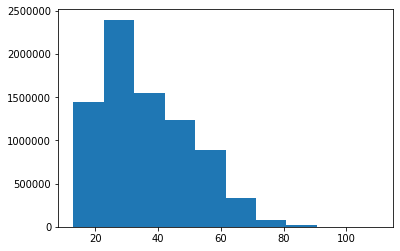

In [34]:
plt.hist(traffic_df['subject_age'])